<a href="https://colab.research.google.com/github/SHDaniels/DSPS_sDaniels/blob/main/hw4.5_sdaniels/in_class_grb_oct16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")

In [3]:
grbAG.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


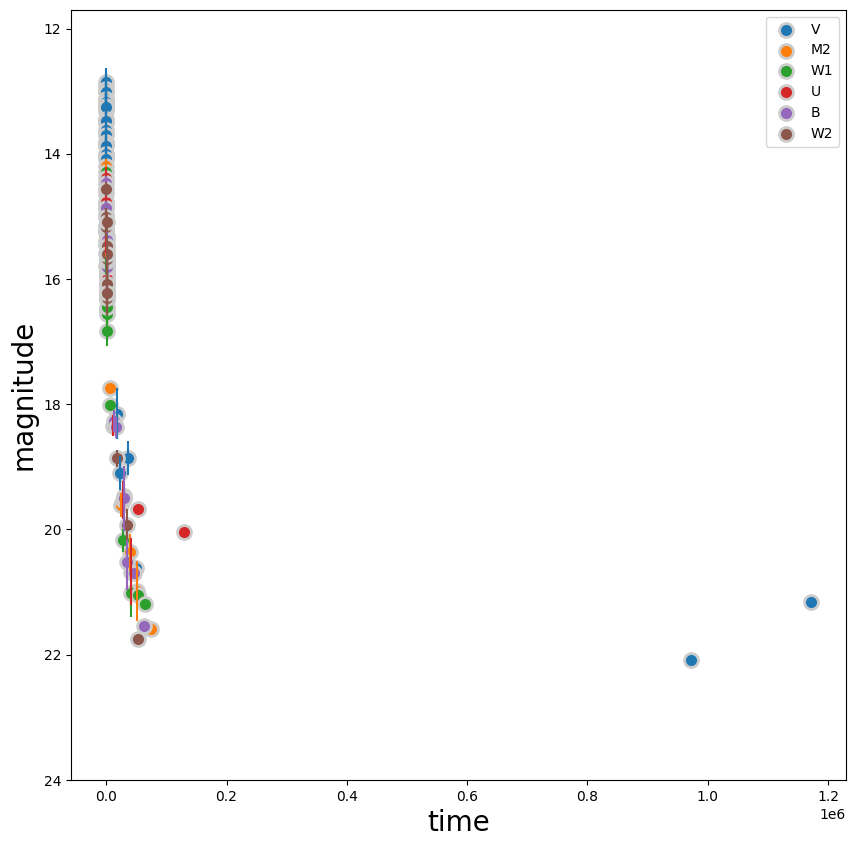

In [4]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("time", fontsize=20);

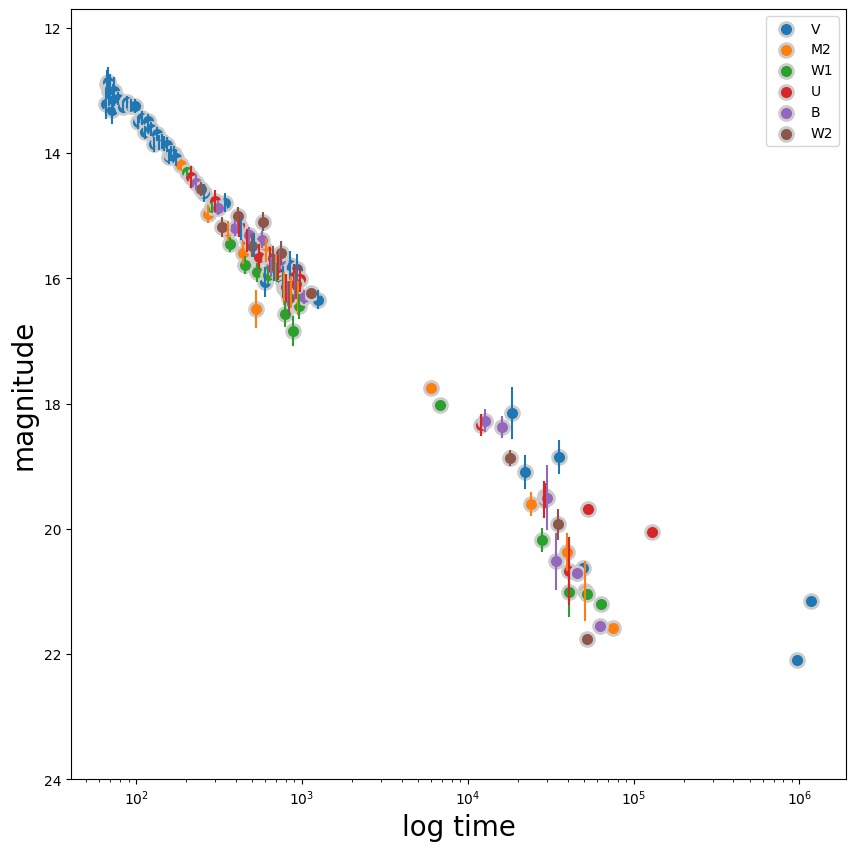

In [5]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);
pl.xscale("log")

We will fit a line in log space. That corresponds to fitting a powerlaw y=x^a in natural space.

In [6]:
grbAG["logtime"] = np.log10(grbAG["time"])

In [7]:
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


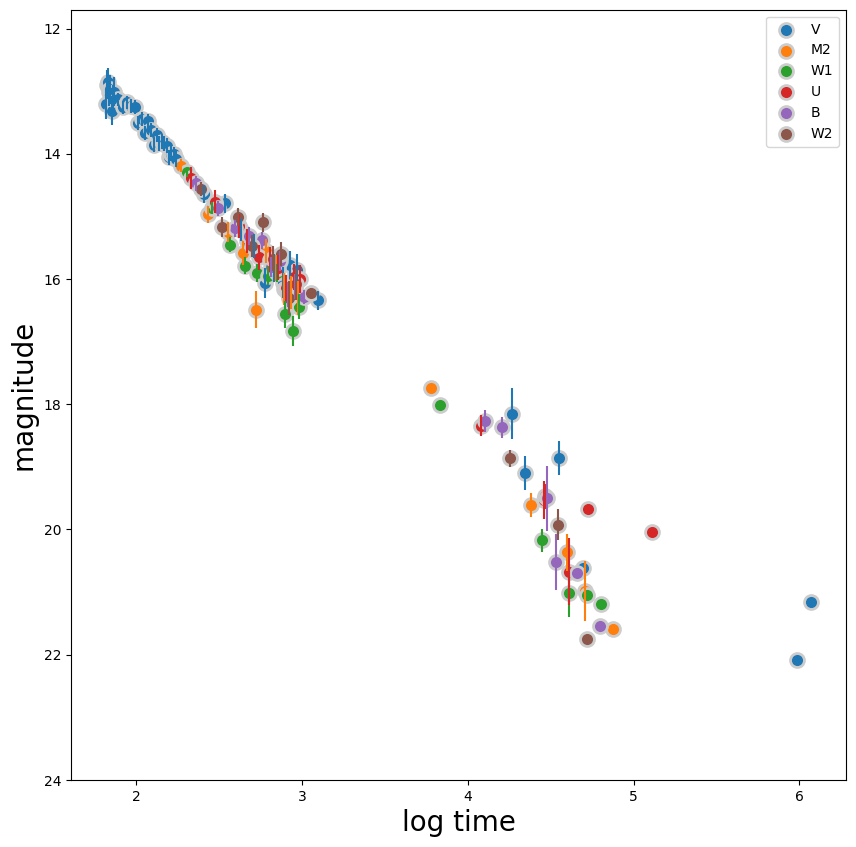

In [8]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

In [9]:
grbAGnoup = grbAG.drop("upperlimit", axis=1)

In [10]:
grbAG_nupper = grbAG[grbAG.upperlimit==0]

In [11]:
grbAG_nupper.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


In [12]:
grbAG = grbAG_nupper

In [13]:
grbAG.head()

,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.21,0.24,0,1.819544
1,V,67,12.90,0.23,0,1.826075
2,V,68,12.86,0.23,0,1.832509
3,V,69,13.01,0.23,0,1.838849
4,V,70,12.97,0.23,0,1.845098


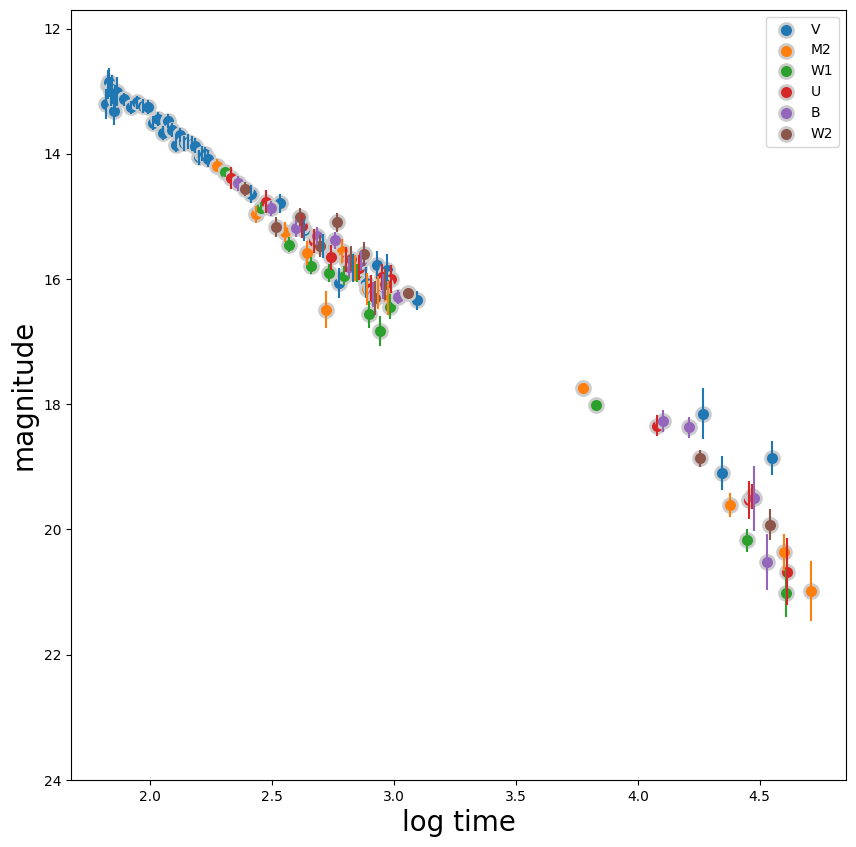

In [14]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure. here is our data.

In [15]:
x = grbAG["logtime"].values
X = np.c_[np.ones(len(x)), x] #now it is matrix - so the intercept is the first one (??)

In [16]:
y = grbAG["mag"].values

In [17]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [18]:
theta_best

array([8.58266823, 2.51199984])

In [19]:
print ("best fit parameters from the Normal Equation: " +
       "intercept {:.2f}, slope {:.2f}".format(*theta_best)) # * takes the objects inside of the pointer

best fit parameters from the Normal Equation: intercept 8.58, slope 2.51


In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(X, y)

LinearRegression()

In [46]:
lr.coef_

array([0.        , 2.51199984])

In [47]:
lr.intercept_

8.582668233648771

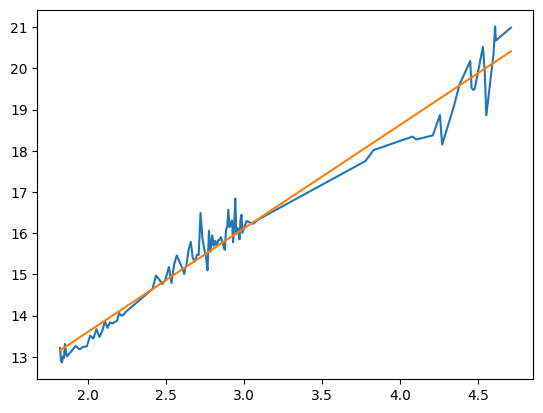

In [48]:
pl.plot(x, y)
pl.plot(x, line(x, slope=lr.coef_[1], intercept=lr.intercept_))

Figure. Checking that the data and the LR fit match up (they do).

In [24]:
from scipy.optimize import minimize

In [25]:
def line(x, intercept, slope): #this is like the likelihood for bayes theorem
  #returns predictions - vector with size input, those are the predictions for ys that correspond to xs
  y = slope*x + intercept
  return y

In [26]:
line(2, 1, np.linspace(0,1,10))

array([1.        , 1.22222222, 1.44444444, 1.66666667, 1.88888889,
       2.11111111, 2.33333333, 2.55555556, 2.77777778, 3.        ])

In [27]:
def l1(args, x, y): #NEED THE ARGS TO FIND TO BE A TUPLE
  #returns one number, the difference between prediction and data
  #should use data and line function
  #y is the magnitude
  intercept, slope = args
  totaldiff = 0
  for i, onex in enumerate(x):
    diff = np.abs(line(onex, intercept, slope) - y[i])
    totaldiff = totaldiff + diff
  return totaldiff

#here is another option
def l1_fed(args, x, y):
  intercept, slope = args
  return sum(np.abs(y-line(intercept, slope, x)))

In [28]:
l1((2, 3), x, y)

560.5463161773461

In [29]:
initialGuess = (2,2)

In [30]:
l1Solution = minimize(l1, initialGuess, args=(x,y)) #the ones that i will not minimize
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " +
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 26.30740226653668
        x: [ 8.230e+00  2.639e+00]
      nit: 8
      jac: [ 0.000e+00 -1.958e+00]
 hess_inv: [[ 6.392e-02 -2.800e-02]
            [-2.800e-02  1.262e-02]]
     nfev: 157
     njev: 51

best fit parameters from the minimization of L1: slope 8.23, intercept 2.64


In [45]:
l1Solution.x

array([8.23021671, 2.63866955])

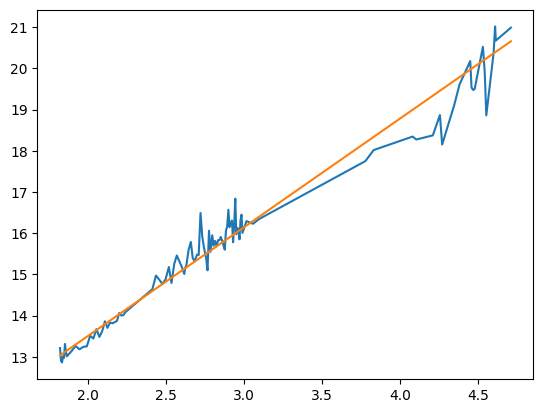

In [50]:
pl.plot(grbAG.logtime.values, y)
pl.plot(x, line(grbAG.logtime.values, slope=l1Solution.x[1], intercept=l1Solution.x[0]))

Figure. Checking that the data and the L1 minimization fit match up (they do).

In [61]:
def l2(args, x, y): #NEED THE ARGS TO FIND TO BE A TUPLE
  #returns one number, the difference between prediction and data
  #should use data and line function
  #y is the magnitude
  intercept, slope = args
  totaldiff = 0
  for i, onex in enumerate(x):
    diff = (np.abs(line(onex, intercept, slope) - y[i]))**2
    totaldiff = totaldiff + diff
  return totaldiff

In [62]:
l2Solution = minimize(l2, initialGuess, args=(x,y)) #the ones that i will not minimize
print(l1Solution)
print("")
print("best fit parameters from the minimization of L1: " +
       "slope {:.2f}, intercept {:.2f}".format(*l1Solution.x))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 26.30740226653668
        x: [ 8.230e+00  2.639e+00]
      nit: 8
      jac: [ 0.000e+00 -1.958e+00]
 hess_inv: [[ 6.392e-02 -2.800e-02]
            [-2.800e-02  1.262e-02]]
     nfev: 157
     njev: 51

best fit parameters from the minimization of L1: slope 8.23, intercept 2.64


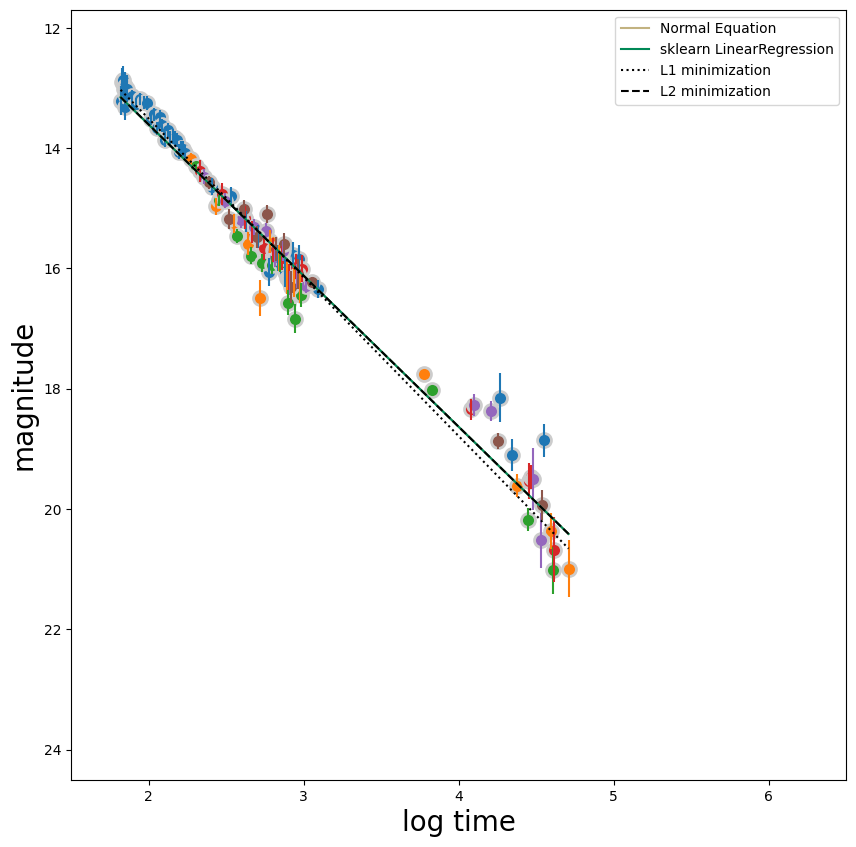

In [63]:
def plotline(pars, x, color='k', symbol='-', label='model',
             alpha=1, ax=ax):
    slope, intercept = pars
    y = line(x, intercept, slope)
    ax.plot(x, y, ls=symbol, c=color, label=label, alpha=alpha)


ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379',
          '604E97', 'F6A600', 'B3446C',
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.coef_[1], lr.intercept_), grbAG.logtime.values,
         color='#'+colors[0],
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best[::-1]), grbAG.logtime,
         color='#'+colors[2], symbol='-',
         label="sklearn LinearRegression", ax=ax)
#minimize L1
plotline((l1Solution.x[::-1]), grbAG.logtime,
         symbol=':',
         label="L1 minimization", ax=ax)
# #minimize L2
plotline((l2Solution.x[::-1]), grbAG.logtime,
         symbol='--',
         label="L2 minimization", ax=ax)
# #minimize chi2
# plotline((chi2Solution.x[::-1]), grbAG.logtime,
#          color='#'+colors[3], symbol='-.',
#          label=r"$\chi^2$ minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure. Here is our data and all fits so far - we can see that the different minimization criteria lead to slightly different results, depending on how heavily they weigh the outliers. The linear regression is the same as the L2 minimization.

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [66]:
lr.fit(x_train, y_train)

LinearRegression()

In [67]:
lr.score(x_train, y_train)

0.9716992501494651

In [68]:
lr.score(x_test, y_test)

0.9695582551350493

The model performs slightly better on the training data than the testing data (as expected), but it is still a good fit.

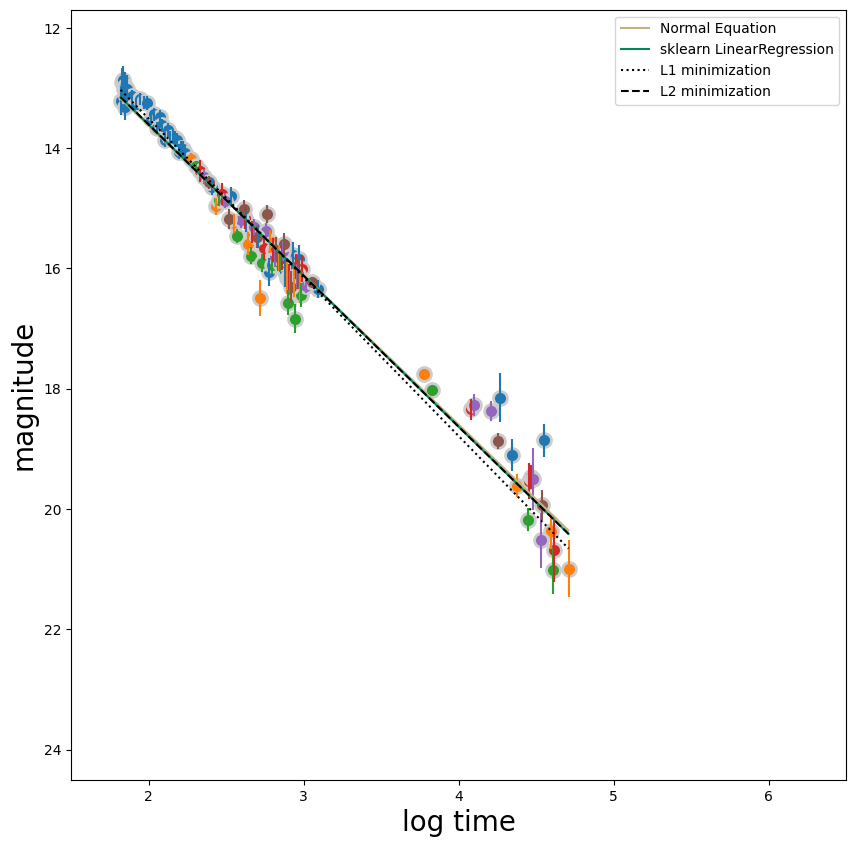

In [69]:
def plotline(pars, x, color='k', symbol='-', label='model',
             alpha=1, ax=ax):
    slope, intercept = pars
    y = line(x, intercept, slope)
    ax.plot(x, y, ls=symbol, c=color, label=label, alpha=alpha)


ax = pl.figure(figsize=(10,10)).add_subplot(111)

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"], fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               edgecolor='#cccccc', label=None)


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].logtime,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

#plotting models
#use Kelley colors for maximum readability
#https://gist.github.com/ollieglass/f6ddd781eeae1d24e391265432297538
colors = ['C2B280', '848482', '008856', 'E68FAC', '0067A5', 'F99379',
          '604E97', 'F6A600', 'B3446C',
          'DCD300', '882D17', '8DB600', '654522', 'E25822', '2B3D26',
          '222222', 'F3C300', '875692', 'F38400', 'A1CAF1', 'BE0032', ]
#normal equation
plotline((lr.coef_[1], lr.intercept_), grbAG.logtime.values,
         color='#'+colors[0],
         label="Normal Equation", ax=ax)
#sklearn
plotline((theta_best[::-1]), grbAG.logtime,
         color='#'+colors[2], symbol='-',
         label="sklearn LinearRegression", ax=ax)
#minimize L1
plotline((l1Solution.x[::-1]), grbAG.logtime,
         symbol=':',
         label="L1 minimization", ax=ax)
# #minimize L2
plotline((l2Solution.x[::-1]), grbAG.logtime,
         symbol='--',
         label="L2 minimization", ax=ax)
# #minimize chi2
# plotline((chi2Solution.x[::-1]), grbAG.logtime,
#          color='#'+colors[3], symbol='-.',
#          label=r"$\chi^2$ minimization", ax=ax)

pl.legend()

#with the LinearRegression object I can also do
#pl.plot(grbAG.logtime, lr.predict(np.c_[np.ones((len(grbAG), 1)), grbAG.logtime]), 'k-')

pl.ylim(24.5,11.7)
pl.xlim(1.5, 6.5)
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

Figure. Here is the same figure as above but with the linear regression (Normal Equation) fit only on the training data. We can see it peeking just above the other linear regression towards the rightmost side of the data.

**Ignore below here for now!**

In [34]:
!pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 962.4 kB/s eta 0:00:00


In [35]:
import emcee

In [36]:
#using log space - always positive, multiplication (likelihood*prior) becomes addition

In [37]:
#need log likelihood and log prior here
#prior should be say do not allow slopes that are negative (prior is based on physics)
def log_prior(theta): #the prior does not know about the data
  slope, intercept = theta
  #step function?
  if slope>0:
    return 0 #adding
  else:
    return -np.inf #be careful not to get caught here though


In [38]:
def log_likelihood(theta, x, y, s):
  slope, intercept = theta
  return -np.sum((t-line(x, intercept, slope))**2/yerr**2)
  #line(x, intercept, slope): #this is like the likelihood for bayes theorem
  #returns predictions - vector with size input, those are the predictions for ys that correspond to xs


In [39]:
#initial guess
ig=[1,10]

In [40]:
#initialize walkers
nwalkers = 32
ndim = len(ig)

In [41]:
pos = np.array(ig) + 1e-4*np.random.randn(nwalkers, ndim)

In [42]:
def log_posterior(theta, x, y, yerr):
  if not np.infinite(log_prior(theta)):
    return -np.inf #so we don't sum infinities
  return(log_likelihood(theta, x, y, s) + log_prior(theta))

In [43]:
#probability needs to know the log likeilhood and the log prior so that it can call them
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, yerr)) #s is the uncertainty

NameError: ignored

In [ ]:
#most meaningul to extract the percentile instead of the stdv because it's walkers ... or something